# Leak Detection using XGBoost with Statistical features


## Introduction

This code is part of Fuel leak detection and location based on NPW.
XGBoost classification using the pressure signals' feature-based representations. 

## Imports and Global Definitions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
label_colors = ["#800080", "#2FAFC6", "#F58C41", "#AF1946", 
                "#46A5E1", "#522A64", "#A3DB05", "#FC6514"]

In [3]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:1500px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [4]:
def select_columns(data_frame, column_names):
    new_frame = data_frame.loc[:, column_names]
    return new_frame

## Data Loading and Exploration

In [5]:
fileName = 'all_features'
df= pd.read_csv(fileName+'_Train_SandF.csv')
df.fillna(0)
df.replace(np.inf, 0)
df.replace(np.nan, 0, inplace=True)

features_name = list(df.columns)
df_test = pd.read_csv(fileName+'_Test_SandF.csv')

df_test.fillna(0)
df_test.replace(np.inf, 0)
df_test.replace(np.nan, 0, inplace=True)

stat_feature=df



In [6]:
df.shape

(2240, 80)

In [7]:
df_test.shape

(560, 80)

In [8]:
stat_feature.head()

,File,PT,StartTime,Label,LeakTime,Mean,Std,Max,Min,argMax,...,cD1_argMax,cD1_argMin,cD2_Mean,cD2_Std,cD2_Max,cD2_Min,cD2_argMax,cD2_argMin,autocov,autocorr
0,2559,HDR3039,2019-11-06-13:32:24.20,0,7,1103.506837,13.055633,1126.877551,1087.877551,1684,...,17,504,0.020234,0.118797,0.367347,-0.112245,18,303,163.920874,0.961313
1,2714,GLT3023,2019-11-12-06:56:56.300,0,1168,1322.945433,31.952953,1364.413061,1248.214694,2499,...,610,43,-0.093187,0.073618,0.153061,-0.224490,309,149,947.389415,0.927540
2,766,HDR3039,2017-03-16-16:25:39.60,0,1206,816.622726,30.016288,846.734694,764.120816,1137,...,629,13,0.062306,0.158876,1.244898,-0.040816,314,58,859.571434,0.953662
3,302,ESH3427,2017-01-26-11:53:42.530,0,1960,1479.348184,26.672224,1514.693878,1413.068571,1853,...,993,60,-0.057323,0.108614,0.295918,-0.326531,496,30,667.645967,0.938111
4,2024,ASK3746,2019-05-21-09:15:36.150,0,21,2428.766547,25.507517,2459.040816,2385.979592,1080,...,43,236,-0.022172,0.247900,0.540817,-0.551020,22,110,624.116561,0.958861


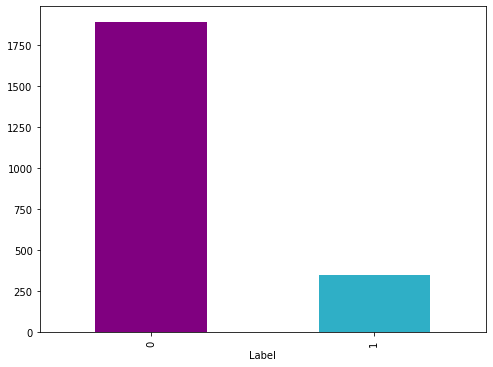

In [9]:
fig = plt.figure(figsize=(8,6))
stat_feature.groupby('Label').PT.count().plot.bar(ylim=0,color=label_colors)
plt.show()

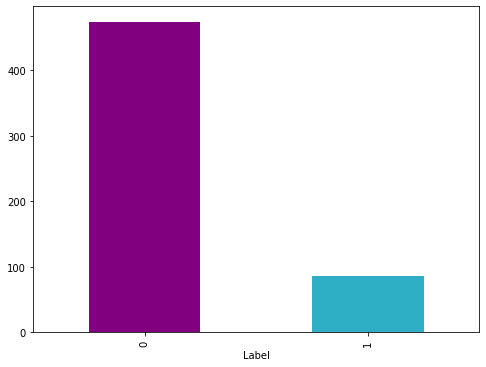

In [10]:
fig = plt.figure(figsize=(8,6))
df_test.groupby('Label').PT.count().plot.bar(ylim=0,color=label_colors)
plt.show()

### Statistical features

In [11]:
y = stat_feature['Label']
X = stat_feature.drop(['File','PT','StartTime','Label'], axis = 1)

In [12]:
X_test = df_test.drop(['File','PT','StartTime','Label'], axis = 1)
y_test = df_test['Label']

## Split the data to train and validation

In [13]:
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=1)
#X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train, test_size=0.2,random_state=1)
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.2,random_state=1)
print("Size of:")
print("* Training-set:\t\t{}".format(len(X_train)))
print("* Validation-set:\t{}".format(len(X_valid)))
print("* Test-set:\t\t{}".format(len(X_test)))

Size of:
* Training-set:		1792
* Validation-set:	448
* Test-set:		560


In [14]:
featur_size =X.shape[1]
print(featur_size)

76


In [15]:
featur_size =X.shape[1]
print(featur_size)

76


## Decision Tree Model

In [16]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

### Evaluation

In [17]:
#Import scikit-learn metrics module for accuracy calculation


# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9482142857142857


### Prediction

In [18]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.8202247191011236
Recall: 0.8488372093023255


In [19]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9482142857142857
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       474
           1       0.82      0.85      0.83        86

    accuracy                           0.95       560
   macro avg       0.90      0.91      0.90       560
weighted avg       0.95      0.95      0.95       560



In [20]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
m = dtree.fit(X,y)

C:\Users\anatk\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


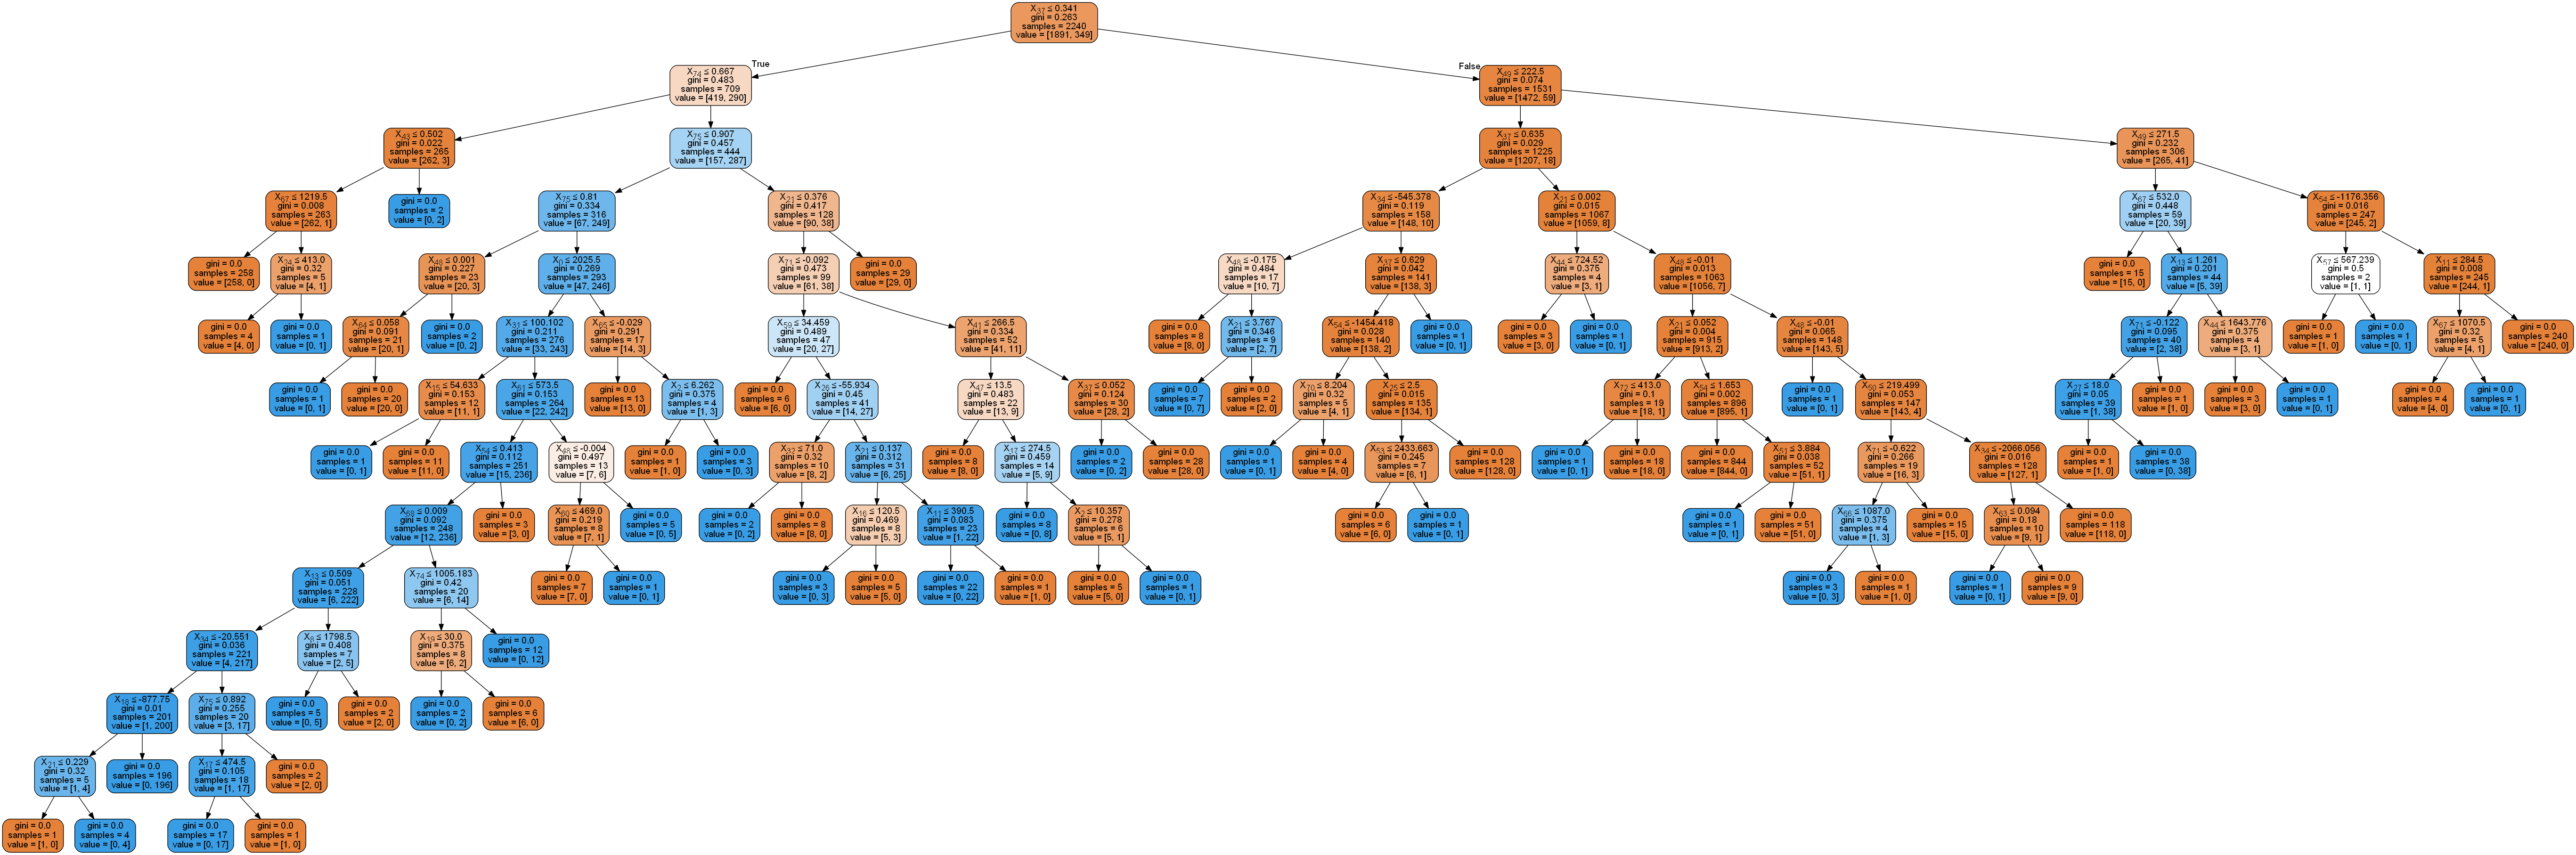

In [21]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


## XGBoost Model

In [22]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from xgboost import XGBClassifier
from xgboost import plot_tree

In [23]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [24]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.6, learning_rate = 0.1,
                max_depth = 50, alpha = 5, n_estimators = 30)

In [25]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[12:00:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [26]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.171975


In [27]:
y_pred2 = (xg_reg.predict(X_test) > 0.5).astype(np.int)

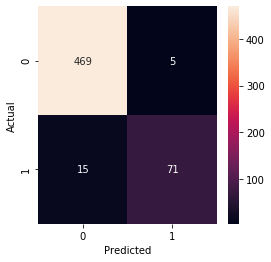

In [28]:
conf_mat=confusion_matrix(y_test, y_pred2)
fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [29]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

Accuracy: 0.9642857142857143
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       474
           1       0.93      0.83      0.88        86

    accuracy                           0.96       560
   macro avg       0.95      0.91      0.93       560
weighted avg       0.96      0.96      0.96       560



In [30]:
model = XGBClassifier(silent=False, 
                      scale_pos_weight=5.4,
                      learning_rate=0.05,  
                      colsample_bytree = 0.8,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=500, 
                      reg_alpha = 0.2,
                      max_depth=5, 
                      gamma=1.5,
                      eta = 0.05,
                     eval_set = [(X_train, y_train), (X_valid, y_valid)])

In [31]:
%%time
#model.fit(X_train,y_train)
# early_stopping_rounds=100,
model.fit(X_train,y_train.values.ravel(), eval_metric=["error", "logloss"], eval_set=[(X_train, y_train), (X_valid, y_valid)], verbose=False)

Wall time: 3.93 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, eta=0.05,
              eval_set=[(      LeakTime         Mean         Std          Max          Min  argMax  \
1896      1726  1893.711694  111.861201  1960.979592  1628.636735     986   
1348      1701  1766.652127    3.660867  1771.795918  1754.428571      65   
1940      1450   508.245645   16.159367   521.489796   478.298775      69   
1549      1981  1459.938563  149.656936  1676.551020  11...
                         779     0
389     0
510     0
1553    0
1172    0
       ..
1812    0
192     0
1878    0
2035    0
834     1
Name: Label, Length: 448, dtype: int64)],
              gamma=1.5, learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.2, reg_lambda=1, scale_pos_weight=5.4, seed=

In [32]:
# make predictions for test data
y_pred = model.predict(X_test)


In [33]:
#y_pred2 = (model.predict(X_test) > 0.5).astype(np.int)
y_pred2 = [round(value) for value in y_pred]
#accuracy = accuracy_score(test_Y, y_pred2)

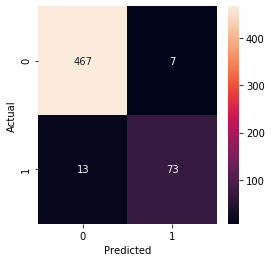

In [34]:
conf_mat=confusion_matrix(y_test, y_pred2)
fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [35]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

Accuracy: 0.9642857142857143
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       474
           1       0.91      0.85      0.88        86

    accuracy                           0.96       560
   macro avg       0.94      0.92      0.93       560
weighted avg       0.96      0.96      0.96       560



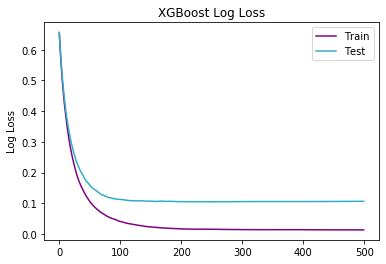

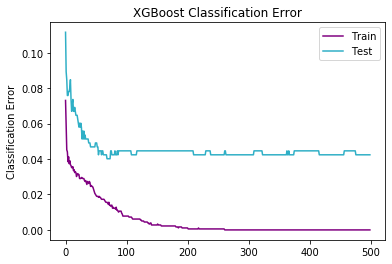

In [36]:
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train', color = "#800080")
ax.plot(x_axis, results['validation_1']['logloss'], label='Test',color = "#2FAFC6")
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()
# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train',color = "#800080")
ax.plot(x_axis, results['validation_1']['error'], label='Test',color = "#2FAFC6")
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()
#"#2FAFC6" "#800080"

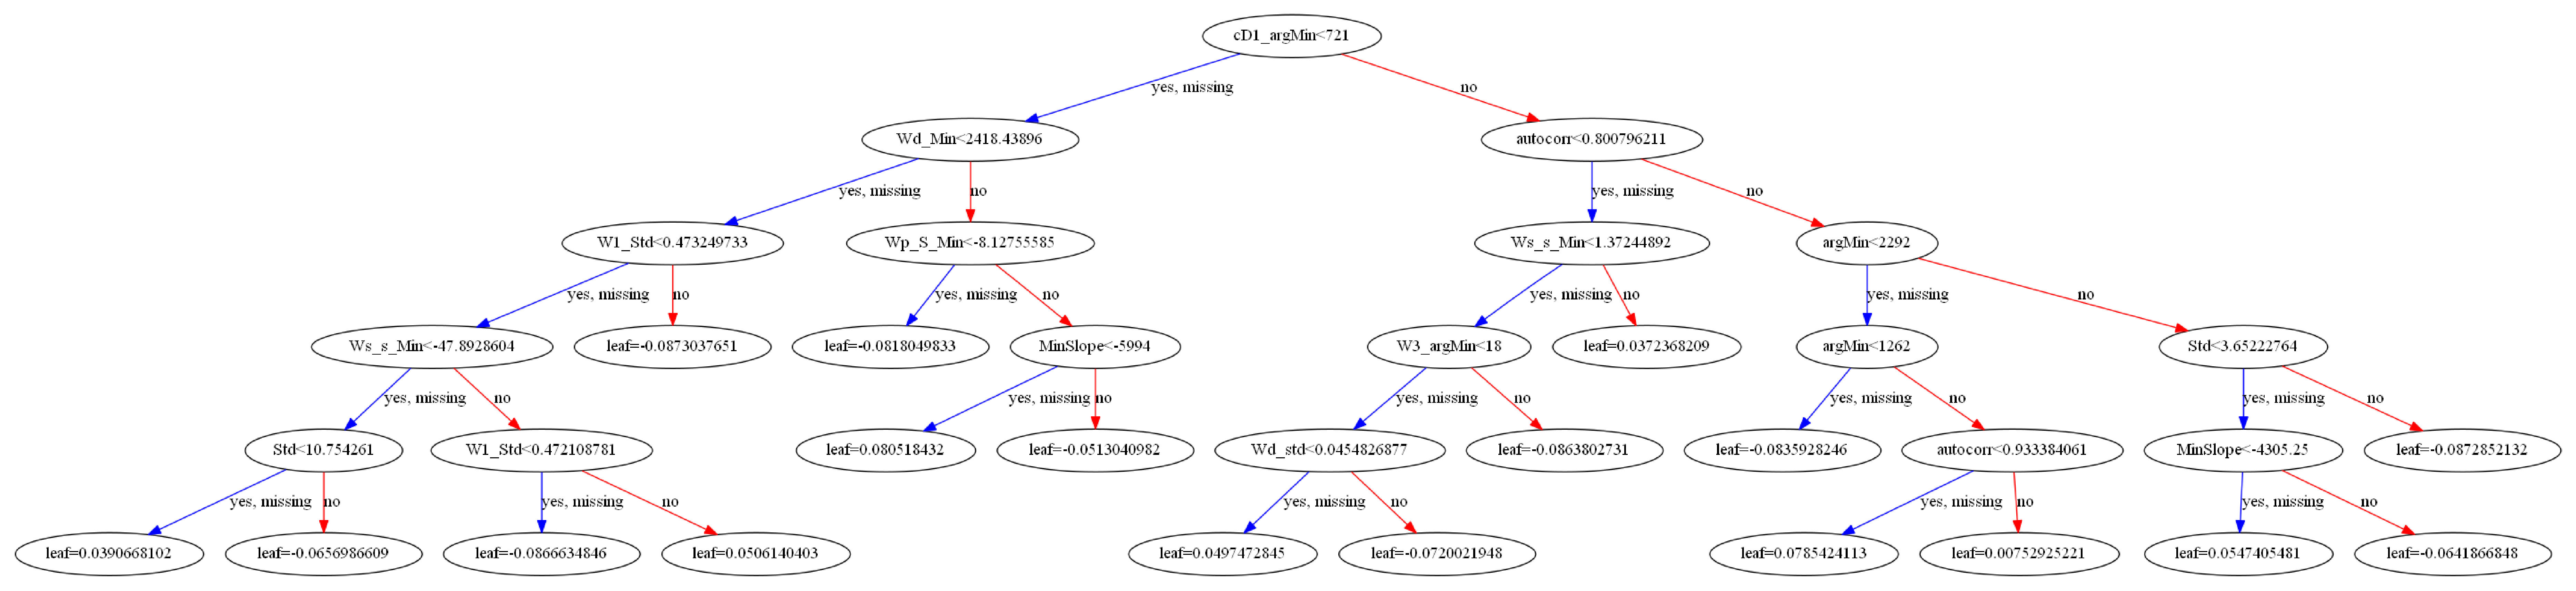

In [37]:
fig = plt.figure(dpi=300,figsize = (25, 20))

ax = plt.subplot(1,1,1)
plot_tree(model,num_trees=3, ax = ax)
plt.tight_layout()
#plt.savefig("tree_structure.pdf")
plt.show()

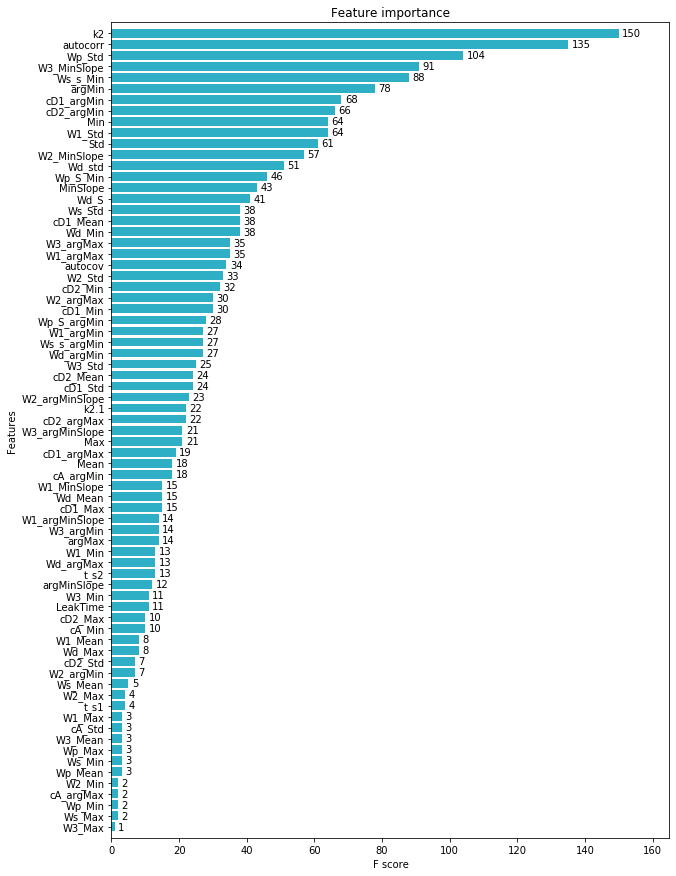

In [38]:
ax = xgb.plot_importance(model, ax=None, height=0.8, xlim=None, title='Feature importance',
                               xlabel='F score', ylabel='Features', grid=False, color = "#2FAFC6")
fig = ax.figure
fig.set_size_inches(10, 15)
#"#800080", "#2FAFC6"

In [39]:
subSet = ['cD1_argMin',
 'Wd_Min',
 'autocorr',
 'cA_Std',
 'cD2_argMin',
 'Wd_argMax',
 'W3_MinSlope',
 'Wd_S',
 'Wd_argMin',
 'W3_argMax',
 'W1_argMin',
 'Ws_s_argMin',
 'autocov',
 'cD1_Mean',
 'argMax',
 'Wd_std',
 'Wd_Mean',
 'Wp_S_argMin',
 'cD1_Min',
 'Wd_Max',
 'W1_argMinSlope']

#['W2_S_argMax', 'S_argMax', 'W1_S_argMax', 'W2_argMax', 'W1_argMin', 'Min']
#['Mean','S_argMax','W1_argMin','W1_S_argMax','W2_Max','W2_argMax','W2_S_argMax','DSmax','DSmin']

In [40]:
X_train

,LeakTime,Mean,Std,Max,Min,argMax,argMin,MinSlope,argMinSlope,t_s1,...,cD1_argMax,cD1_argMin,cD2_Mean,cD2_Std,cD2_Max,cD2_Min,cD2_argMax,cD2_argMin,autocov,autocorr
1896,1726,1893.711694,111.861201,1960.979592,1628.636735,986,2499,-66403.499930,1727,1727,...,886,127,0.264468,0.536490,3.000000,-0.040817,443,127,11696.148620,0.934351
1348,1701,1766.652127,3.660867,1771.795918,1754.428571,65,1787,-10941.000030,1699,1699,...,870,573,0.002509,0.105410,0.489796,-0.295918,436,286,10.706086,0.798526
1940,1450,508.245645,16.159367,521.489796,478.298775,69,2499,-14114.499990,1448,1448,...,746,891,0.034356,0.088242,0.622449,-0.071429,374,153,248.194300,0.950100
1549,1981,1459.938563,149.656936,1676.551020,1149.831020,1688,0,-105898.500000,1979,1979,...,1019,221,-0.234320,1.020912,3.734694,-1.602041,509,110,21187.528680,0.945612
1785,2117,217.234008,3.112601,219.959184,201.918367,2278,2202,-11901.000000,2116,2116,...,1087,1118,0.002117,0.160830,0.704082,-0.704082,543,560,4.514651,0.465804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,1264,2837.065698,3.072636,2838.979592,2828.265306,334,1419,-8192.000051,1264,1264,...,658,810,0.000703,0.076106,0.418367,-0.428571,328,406,8.174462,0.865492
905,1479,1290.750000,0.070425,1291.002449,1290.551020,2499,565,-190.000195,74,74,...,84,1034,0.000188,0.023866,0.061225,-0.051021,6,50,0.000812,0.163683
1096,1518,2275.125788,3.147874,2277.081633,2266.163265,1055,1839,-9132.500097,1522,1522,...,790,945,0.000471,0.080238,0.459184,-0.428571,395,466,8.600751,0.867617
235,1959,1816.968143,6.882269,1825.448980,1803.000000,218,2087,-4231.499934,1961,1961,...,1004,1061,0.016880,0.038237,0.173469,-0.081633,502,531,44.608298,0.941410


In [41]:
X_trainBest = X_train.loc[:,subSet]
X_validBest = X_valid.loc[:,subSet]
X_testBest = X_test.loc[:,subSet]

In [42]:
model.fit(X_trainBest,y_train.values.ravel(), eval_metric=["error", "logloss"], eval_set=[(X_trainBest, y_train), (X_validBest, y_valid)], verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, eta=0.05,
              eval_set=[(      LeakTime         Mean         Std          Max          Min  argMax  \
1896      1726  1893.711694  111.861201  1960.979592  1628.636735     986   
1348      1701  1766.652127    3.660867  1771.795918  1754.428571      65   
1940      1450   508.245645   16.159367   521.489796   478.298775      69   
1549      1981  1459.938563  149.656936  1676.551020  11...
                         779     0
389     0
510     0
1553    0
1172    0
       ..
1812    0
192     0
1878    0
2035    0
834     1
Name: Label, Length: 448, dtype: int64)],
              gamma=1.5, learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.2, reg_lambda=1, scale_pos_weight=5.4, seed=

In [43]:
y_pred = model.predict(X_testBest)

In [44]:
y_pred_v = model.predict(X_validBest)

In [45]:
y_pred2 = [round(value) for value in y_pred]

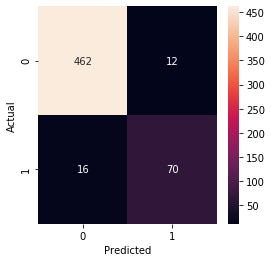

In [46]:
conf_mat=confusion_matrix(y_test, y_pred2)
fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [47]:
print("Validation Accuracy:",metrics.accuracy_score(y_valid, y_pred_v))
print(classification_report(y_valid, y_pred_v))

Validation Accuracy: 0.9375
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       377
           1       0.79      0.83      0.81        71

    accuracy                           0.94       448
   macro avg       0.88      0.89      0.89       448
weighted avg       0.94      0.94      0.94       448



In [48]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       474
           1       0.85      0.81      0.83        86

    accuracy                           0.95       560
   macro avg       0.91      0.89      0.90       560
weighted avg       0.95      0.95      0.95       560



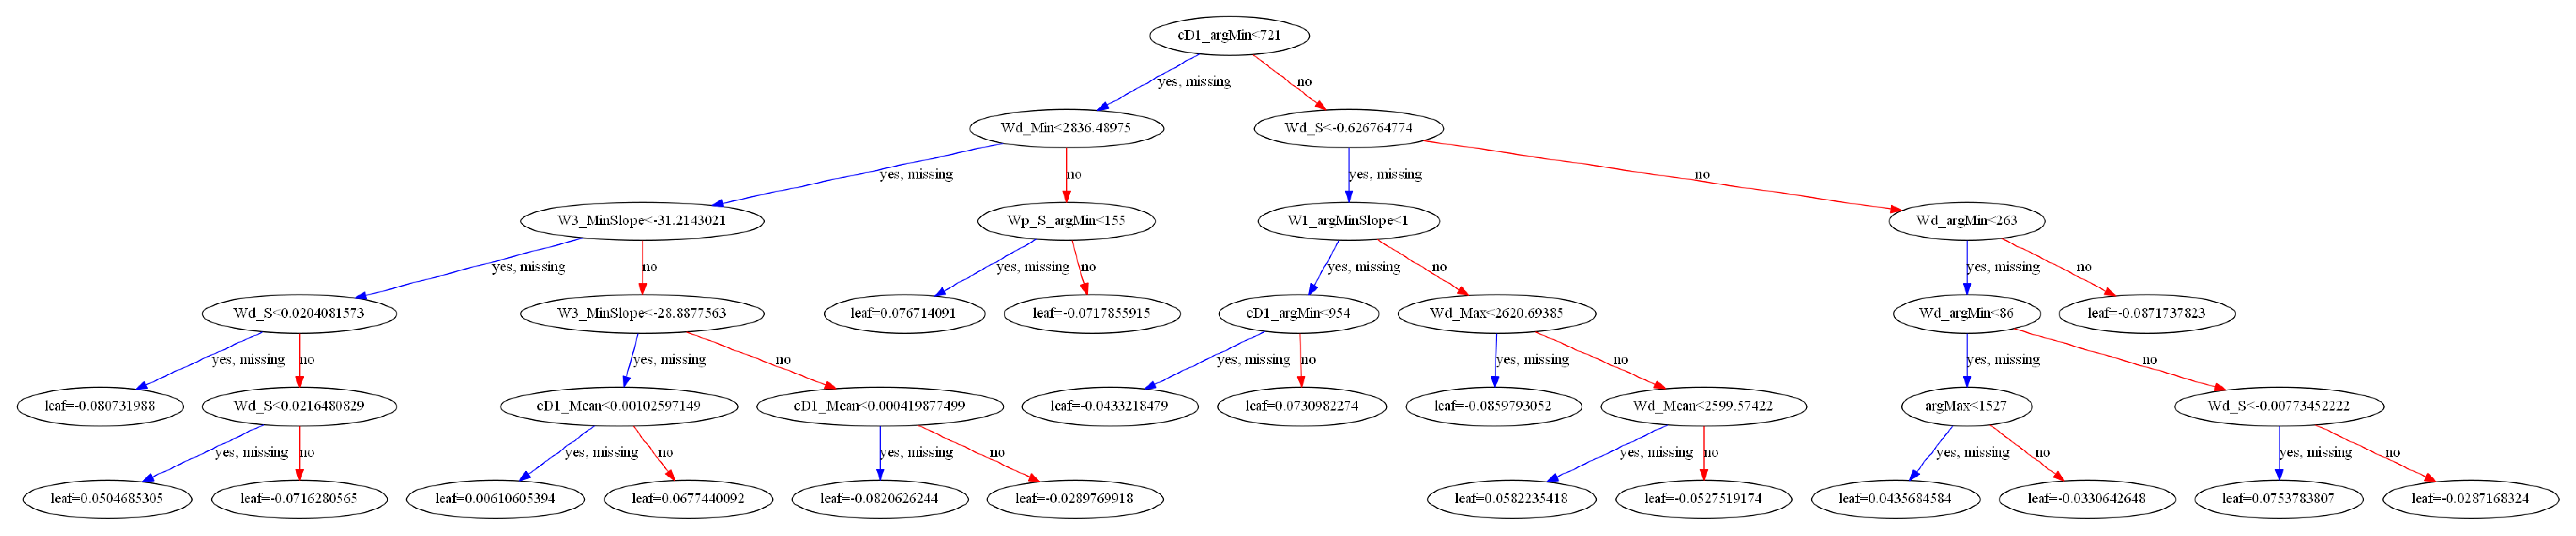

In [49]:
fig = plt.figure(dpi=300,figsize = (20, 40))

ax = plt.subplot(1,1,1)
plot_tree(model,num_trees=4, ax = ax)
plt.tight_layout()
#plt.savefig("tree_structure.pdf")
plt.show()

In [50]:
y = pd.DataFrame(y_test)
y['Predict Val'] = y_pred.flatten()
y['DIFF'] = y['Label'] - y['Predict Val']
y = y.loc[y['DIFF']  != 0]


In [51]:
pt_df= pd.read_csv('Test_Data.csv')

In [52]:
incorrect = pt_df.iloc[y.index.tolist()]

In [53]:
incorrect

,File,PT,StartTime,Label,LeakTime,s0,s1,s2,s3,s4,...,s2490,s2491,s2492,s2493,s2494,s2495,s2496,s2497,s2498,s2499
34,2205,ASH3041,2019-08-09-10:46:58.440,0,1168,2641.830204,2641.831327,2641.832449,2641.833571,2641.834694,...,2648.988265,2648.986122,2648.983980,2648.981837,2648.979694,2648.977551,2648.975408,2648.973265,2648.971122,2648.968980
39,685,ELR3041,2017-03-13-14:15:22.600,1,1767,1895.146122,1895.144286,1895.142449,1895.140612,1895.138776,...,1894.654082,1894.651429,1894.648776,1894.646122,1894.643469,1894.640816,1894.638163,1894.635510,1894.632857,1894.630204
57,159,HDR3039,2017-01-11-09:58:13.930,1,1018,1006.225306,1006.221020,1006.216735,1006.212449,1006.208163,...,1005.844388,1005.840816,1005.837245,1005.833673,1005.830102,1005.826531,1005.822959,1005.819388,1005.815816,1005.812245
88,1062,BLU3166,2017-04-09-14:02:19.610,0,1700,185.911837,185.912959,185.914082,185.915204,185.916327,...,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
89,1177,GLT3034,2017-04-26-15:39:29.920,0,433,1005.259592,1005.264082,1005.268571,1005.273061,1005.277551,...,999.790816,999.783673,999.776531,999.769388,999.762245,999.755102,999.747959,999.740816,999.733673,999.726531
113,5,HDR3032,2017-01-04-15:50:25.10,1,1193,2836.617143,2836.604184,2836.591224,2836.578265,2836.565306,...,2825.961224,2825.951837,2825.942449,2825.933061,2825.923673,2825.914286,2825.904898,2825.895510,2825.886122,2825.876735
116,1010,HDR3039,2017-04-05-10:53:37.920,1,1160,1083.960000,1083.960816,1083.961633,1083.962449,1083.963265,...,1078.765306,1078.779592,1078.793878,1078.808163,1078.822449,1078.836735,1078.851020,1078.865306,1078.879592,1078.893878
137,360,ESH3426,2017-02-04-11:36:16.970,0,1916,210.773061,210.765510,210.757959,210.750408,210.742857,...,201.540816,201.522449,201.504082,201.485714,201.467347,201.448980,201.430612,201.412245,201.393878,201.375510
153,1012,HDR3032,2017-04-05-10:56:01.40,0,1547,298.457143,298.462755,298.468367,298.473980,298.479592,...,287.803571,287.779592,287.755612,287.731633,287.707653,287.683673,287.659694,287.635714,287.611735,287.587755
160,2543,ASH3036,2019-11-06-09:10:31.40,1,1767,1028.668571,1028.650918,1028.633265,1028.615612,1028.597959,...,223.344388,222.653061,221.961735,221.270408,220.579082,219.887755,219.196429,218.505102,217.813776,217.122449


In [55]:
from IPython.display import clear_output

GLT3034   1177
0


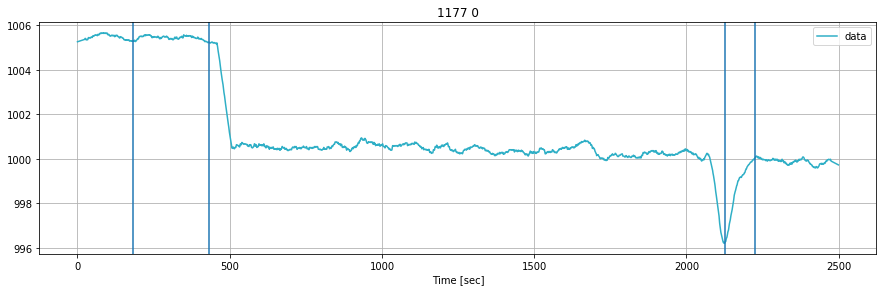

E for exite


In [56]:
    t = np.linspace(0, 2500, 2500, endpoint=False)
    for index, row in incorrect.iterrows():
        print(row['PT'], " ", row['File'])
        print(row['Label'])
        press = row.drop(['File','PT','StartTime','Label','LeakTime'])#,'maxVal','minVal','h','minPoint','maxPoint'
        data = press
        minPoint_y = data.min()
        minPoint_x = np.argmin(data)
        leakPoint_x = row['LeakTime']
        leakPoint_y = row['s'+str(leakPoint_x)]

        plt.subplot(2, 1, 2)
        plt.plot(t, press, '#2FAFC6', label='data')

        #plt.plot(leakPoint_x,leakPoint_y, 'ro')
        #plt.plot(data2['LeakTime'],y['s'+str(data2['LeakTime'])], 'ro')
        xcoords = [leakPoint_x - 250, leakPoint_x, minPoint_x, minPoint_x + 100]

        colors = ['r','r','b','b']
        for xc in xcoords:
            plt.axvline(x=xc)
        
        title = str(row['File'])+" "+str(row['Label'])
        plt.title(title)
        plt.xlabel('Time [sec]')
        plt.grid()
        plt.legend()
        plt.subplots_adjust(hspace=0.35)
        
        fig_size = plt.gcf().get_size_inches() #Get current size
        sizefactor = 2.5 #Set a zoom factor
        # Modify the current size by the factor
        plt.gcf().set_size_inches(sizefactor * fig_size) 
        plt.show()
        plt.show()
        
        
        exitKey = input("E for exit")
        type(exitKey)          
        if (exitKey == 'E') or (exitKey == 'e'):    
            break
        clear_output(wait=True)

## Save the Model

In [ ]:
model.save_model('XGBClassifierModel')